In [93]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os
sns.set(style="whitegrid", color_codes=True)

import string

In [116]:
def word_analysis(filename):

    title = ''

    with open(filename, encoding='utf-8') as book:
        #print(book.read()[:1000])
        for i, line in enumerate(book):
            if line.startswith('Title:'):
                title = line[6:]
            if line.startswith('*** START OF THIS PROJECT'):
                break

        #set up letter counter v   
        letter_frequencies = {}
        for letter in string.ascii_uppercase:
            letter_frequencies[letter] = 0

        for i, line in enumerate(book):
            #This starts reading^
            for char in line:
                if char in string.ascii_letters:
                    uppercase = char.upper()
                    letter_frequencies[uppercase] += 1

            if line.startswith('*** END OF THIS PROJECT'):
                break

#         print (letter_frequencies)

        total = sum(letter_frequencies.values())
             
        letter_percentages = {}
        for letter, count in letter_frequencies.items():
            letter_percentages[letter] = count/total * 100

        data = {
            'letters': list(letter_percentages.keys()),
            'percentages': list(letter_percentages.values()),
        }

        plt.figure()
        plot = sns.barplot(x='letters',y='percentages', data=data, palette='rainbow_r')
        plot.set_title("{0}\n total {1} characters".format(title, total))
        plot.set_xlabel('Letters')
        plot.set_ylabel('Percentages')


        fmt = '%.0f%%' 
        yticks = mtick.FormatStrFormatter(fmt)
        plot.yaxis.set_major_formatter(yticks)

#   print('The total number of letters is', total)

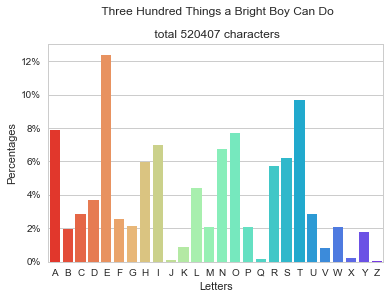

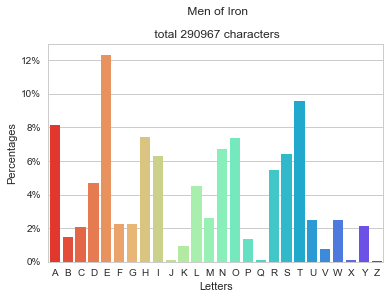

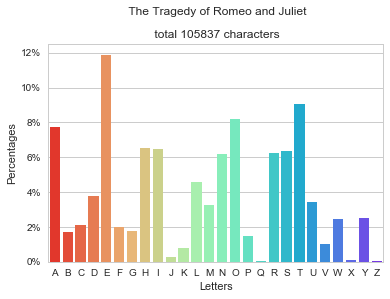

In [117]:
# print(list(os.walk('.')))
for root, dirs, files in os.walk('.'):
    for f in files:
        if f.endswith('.txt'):
             word_analysis(f)
    break
    
   
       